In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("dataset/train.csv")

In [3]:
train_df

,text,label_sexist,label_category,label_vector
0,"Who does Jenner think she is, Hillary Clinton?...",not sexist,none,none
1,these women were pretty dumb to think a big ri...,not sexist,none,none
2,This. Also with the girls who have the potenti...,not sexist,none,none
3,We actually agree to a point. The problem is t...,not sexist,none,none
4,Plenty of women so it's still a minority.,not sexist,none,none
...,...,...,...,...
7995,There are direct racial parallels that I won't...,not sexist,none,none
7996,[USER] Isn't she the one that openly said her ...,not sexist,none,none
7997,"Unfortunately, we know some men are ready to s...",sexist,2. derogation,2.2 aggressive and emotive attacks
7998,"So, your mother and father are nazis? Do you l...",not sexist,none,none


In [4]:
test_df = pd.read_csv("dataset/test.csv")

In [5]:
test_df

,text,label_sexist,label_category,label_vector
0,Trying to cut right now.,not sexist,none,none
1,I don't pay these assholes to use their server...,not sexist,none,none
2,Long term strategic thinking is a rare skill i...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
3,tell that cunt to come to my house and take it...,sexist,"1. threats, plans to harm and incitement",1.1 threats of harm
4,Loretta Lynn fractures her hip A statement pos...,not sexist,none,none
...,...,...,...,...
1995,"she is a man, abort.",not sexist,none,none
1996,Your mom's worn down,not sexist,none,none
1997,So dumb!,not sexist,none,none
1998,Why is raping old White woman an exclusively B...,not sexist,none,none


In [6]:
sorted(list(train_df.label_category.unique()))

['1. threats, plans to harm and incitement',
 '2. derogation',
 '3. animosity',
 '4. prejudiced discussions',
 'none']

In [7]:
sorted(list(train_df.label_vector.unique()))

['1.1 threats of harm',
 '1.2 incitement and encouragement of harm',
 '2.1 descriptive attacks',
 '2.2 aggressive and emotive attacks',
 '2.3 dehumanising attacks & overt sexual objectification',
 '3.1 casual use of gendered slurs, profanities, and insults',
 '3.2 immutable gender differences and gender stereotypes',
 '3.3 backhanded gendered compliments',
 '3.4 condescending explanations or unwelcome advice',
 '4.1 supporting mistreatment of individual women',
 '4.2 supporting systemic discrimination against women as a group',
 'none']

In [8]:
sexist_train_df = pd.DataFrame(train_df[train_df['label_sexist'] == 'sexist'])

In [9]:
sexist_train_df.shape, train_df.shape

((1997, 4), (8000, 4))

In [10]:
sexist_test_df = pd.DataFrame(test_df[test_df['label_sexist'] == 'sexist'])

In [11]:
sexist_test_df.shape, test_df.shape

((482, 4), (2000, 4))

In [12]:
label_cats = sorted(list(train_df.label_category.unique()))

In [13]:
for i,label_cat in enumerate(label_cats):
    print(f"{i} ==> {label_cat} ==> Count = {train_df[train_df['label_category'] == label_cat].shape[0]}")

0 ==> 1. threats, plans to harm and incitement ==> Count = 198
1 ==> 2. derogation ==> Count = 924
2 ==> 3. animosity ==> Count = 685
3 ==> 4. prejudiced discussions ==> Count = 190
4 ==> none ==> Count = 6003


In [14]:
for i,label_vec in enumerate(sorted(list(train_df.label_vector.unique()))):
    print(f"{i} ==> {label_vec} ==> Count = {train_df[train_df['label_vector'] == label_vec].shape[0]}")

0 ==> 1.1 threats of harm ==> Count = 38
1 ==> 1.2 incitement and encouragement of harm ==> Count = 160
2 ==> 2.1 descriptive attacks ==> Count = 410
3 ==> 2.2 aggressive and emotive attacks ==> Count = 386
4 ==> 2.3 dehumanising attacks & overt sexual objectification ==> Count = 128
5 ==> 3.1 casual use of gendered slurs, profanities, and insults ==> Count = 376
6 ==> 3.2 immutable gender differences and gender stereotypes ==> Count = 253
7 ==> 3.3 backhanded gendered compliments ==> Count = 34
8 ==> 3.4 condescending explanations or unwelcome advice ==> Count = 22
9 ==> 4.1 supporting mistreatment of individual women ==> Count = 44
10 ==> 4.2 supporting systemic discrimination against women as a group ==> Count = 146
11 ==> none ==> Count = 6003


In [24]:
train_df.columns

Index(['text', 'label_sexist', 'label_category', 'label_vector'], dtype='object')

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            8000 non-null   object
 1   label_sexist    8000 non-null   object
 2   label_category  8000 non-null   object
 3   label_vector    8000 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [25]:
train_df.isnull().any()

text              False
label_sexist      False
label_category    False
label_vector      False
dtype: bool

In [16]:
train_df.describe()

,text,label_sexist,label_category,label_vector
count,8000,8000,8000,8000
unique,8000,2,5,12
top,"Who does Jenner think she is, Hillary Clinton?...",not sexist,none,none
freq,1,6003,6003,6003


In [18]:
train_df['label_sexist'].value_counts()

not sexist    6003
sexist        1997
Name: label_sexist, dtype: int64

In [22]:
train_df['label_category'].value_counts()

none                                        6003
2. derogation                                924
3. animosity                                 685
1. threats, plans to harm and incitement     198
4. prejudiced discussions                    190
Name: label_category, dtype: int64

In [23]:
train_df['label_vector'].value_counts()

none                                                               6003
2.1 descriptive attacks                                             410
2.2 aggressive and emotive attacks                                  386
3.1 casual use of gendered slurs, profanities, and insults          376
3.2 immutable gender differences and gender stereotypes             253
1.2 incitement and encouragement of harm                            160
4.2 supporting systemic discrimination against women as a group     146
2.3 dehumanising attacks & overt sexual objectification             128
4.1 supporting mistreatment of individual women                      44
1.1 threats of harm                                                  38
3.3 backhanded gendered compliments                                  34
3.4 condescending explanations or unwelcome advice                   22
Name: label_vector, dtype: int64

In [28]:
# train_df['label_sexist'].plot(kind='hist')

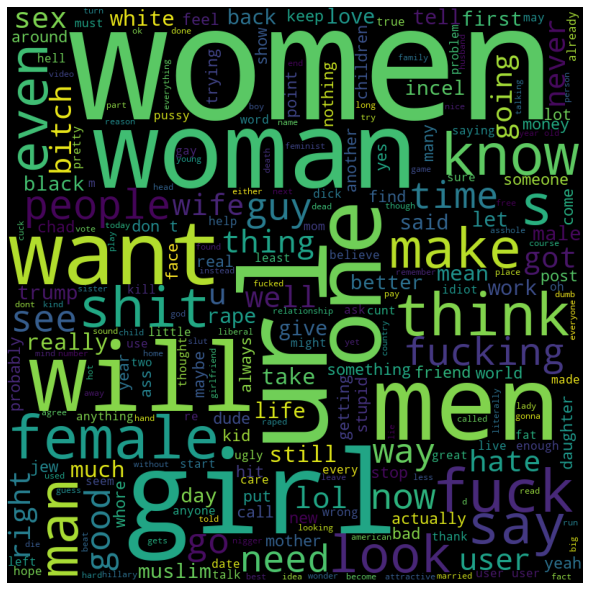

In [48]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in train_df.text:
     
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(
    width = 800, 
    height = 800,
    background_color ='black',
    stopwords = stopwords,
    min_font_size = 10,
    max_words=250,
).generate(comment_words)
 
    
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [43]:
train_df.describe()

,text,label_sexist,label_category,label_vector
count,8000,8000,8000,8000
unique,8000,2,5,12
top,"Who does Jenner think she is, Hillary Clinton?...",not sexist,none,none
freq,1,6003,6003,6003
